In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from astropy.io import fits
import numpy as np

# Question 2

The `FITS` file `MACSJ0416_HAWKI.fits` contains a near infrared (_Ks_-band) image of the center
   of the cluster of galaxies `MACS J0416.1-2403` at $z=0.4$. It was taken with the HAWK-I instrument at
   the VLT as part of the ESO contribution to the [FrontierFields program](http://gbrammer.github.io/HAWKI-FF/)).  

   - Using the `astropy` library, load that file in python and show us the most important parameters,
     like image size and headers.

   -  Display the previous image with `matplotlib` in a way that the objects can be distinguished by
     eye (by adjusting the contrast). Find the pixel with the maximum value and draw a circle around it.
     Finally save the image as a PDF file.

In [2]:
hdu = fits.open("../MACSJ0416_HAWKI.fits")
header = hdu[0].header
data = hdu[0].data

print(hdu.info())
print()
print(repr(header))

Filename: ../MACSJ0416_HAWKI.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (1200, 1200)   float32   
None

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1200                                                  
NAXIS2  =                 1200                                                  
EQUINOX =              2000.0  / [yr] Equinox of equatorial coordinates         
RADECSYS= 'FK5     '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           
CUNIT1  = 'deg     '           / Units of coordinate increment and value        
CRVAL1  =      64.08926666667  / [deg] Coordinate value at reference point      
CRPIX1  =           

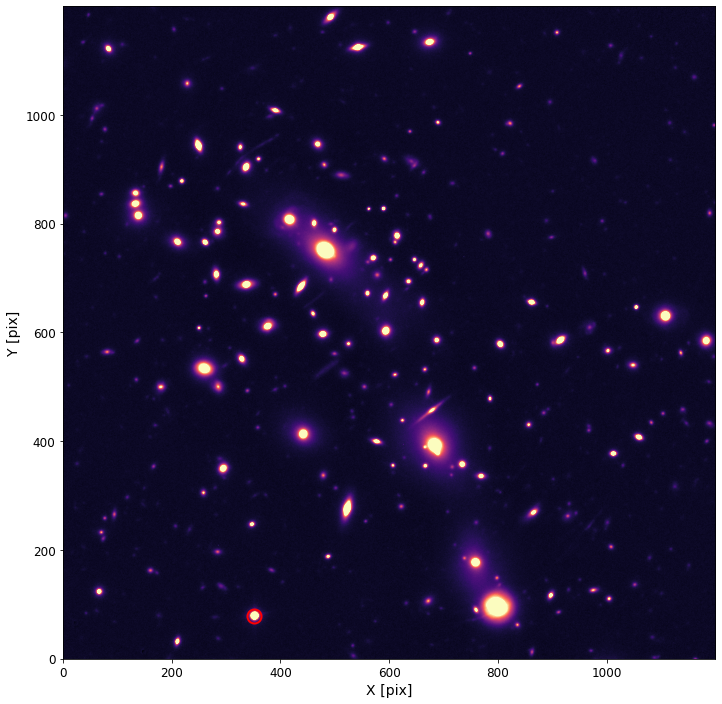

In [3]:
fig = plt.figure(figsize=(12,12))

vmin = np.min(data)
vmax = np.median(data) + 3*np.std(data)
plt.imshow(data, origin="lower", vmin=vmin, vmax=vmax, cmap="magma")


(X, Y) = np.where(data == np.max(data))

plt.plot(Y[0], X[0], "o", ms=14, mfc="None", mec="r", mew=2)

plt.xlabel("X [pix]", fontsize=14)
plt.ylabel("Y [pix]", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("MACSJ0416_HAWKI.pdf")

# Question 3

Do some statistics (mean, median and standard deviation) of the previous image using `numpy` statistical functions.
   Create an histogram of the pixel values and plot it with `matplotlib`.

   Now, using ``curvefit`` from ``scipy.optimize`` fit a Gaussian to the histogram values and determine
   the center (mean) and the sigma (standard deviation) from the fit. Discuss the differences with values
   derived by `numpy`.

mean:  0.06401208
median:  0.006286473
standard deviation:  0.67112803
min:  -0.1543041
max:  162.68599


(-0.5, 1.5)

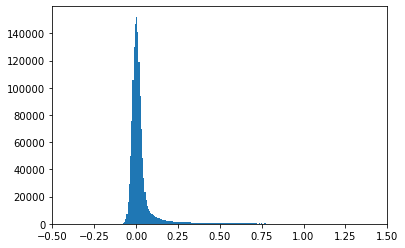

In [4]:
print("mean: ", np.mean(data))
print("median: ", np.median(data))
print("standard deviation: ", np.std(data))
print("min: ", np.min(data))
print("max: ", np.max(data))

low_cut = np.min(data)
high_cut = np.mean(data) + 5*np.std(data)

data_cut =  data[(data>low_cut) & (data<high_cut) ]
values, edges, patches = plt.hist(data_cut.flatten(), bins=500)
centers = (edges[0:-1] + edges[1:]) / 2

plt.xlim(-0.5, 1.5)


In [5]:
from scipy.optimize import curve_fit

def gaussian(x, mean, sigma, amplitude):
    return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2.))

results, cov_matrix = curve_fit(gaussian, centers, values, sigma=np.sqrt(values))

print("mean: ", results[0])
print("std: ", results[1])
print("amplitude: ", results[2])

mean:  0.003604400415099331
std:  0.024655971266498565
amplitude:  146065.66786952788


(-0.25, 0.75)

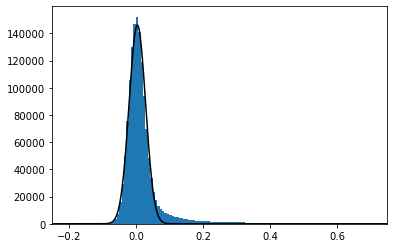

In [6]:
values, edges, patches = plt.hist(data_cut.flatten(), bins=500)
x = np.arange(-1, 2, 0.001)
plt.plot(x, gaussian(x, results[0], results[1], results[2]), color="k")
plt.xlim(-0.25, 0.75)


# Question 4

Consider the data table `rotcurve.txt` provided with this exercise. It contains data for a rotation curve
   for a galaxy with columns `r` for radius, `vel` for velocity and the error in `vel`. Please read the file
   (with `astropy`) and plot that information (including the errors) with `matplotlib`.

   What is the maximum rotation velocity of this galaxy? Try to determine it by fitting the following
   function to the data (but other ideas are also welcome)

   $V(r) = \frac{2}{\pi} V_{max} \arctan(r/r_d)$,

   where $r_d$ is the disk scale length, $\sim 5$ in this case, but can also be left as a free parameter.


Text(0, 0.5, 'vel')

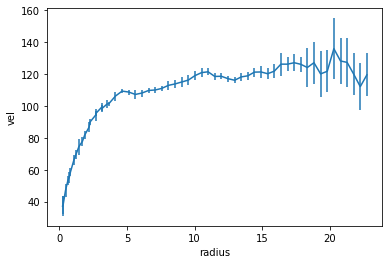

In [7]:
from astropy.table import Table

tbl = Table.read("../rotcurve.txt", format="ascii")

r = tbl["r"]
vel = tbl["vel"]
e_vel = tbl["e_vel"]

plt.errorbar(r, vel, e_vel)
plt.xlabel("radius")
plt.ylabel("vel")

vmax= 123.51962479823341
r_d 0.9699383895661956


Text(0, 0.5, 'vel')

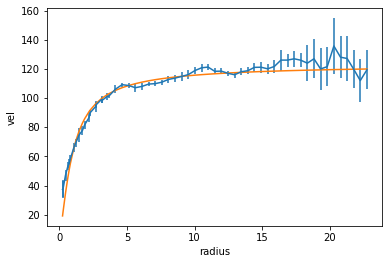

In [8]:
def vel_curve(r, vmax, r_d):
    return (2/np.pi) * vmax * np.arctan(r / r_d)

results, cov_matrix = curve_fit(vel_curve, r, vel, p0=[100, 5], sigma=e_vel)

plt.errorbar(r, vel, e_vel)
plt.plot(r, vel_curve(r, results[0], results[1]))

print("vmax=", results[0])
print("r_d", results[1])
plt.xlabel("radius")
plt.ylabel("vel")

# Question 5

The file `SDSS_spec_galaxy.csv` contains the spectrum of a star forming galaxy observed as
   part of the Sloan Digital Sky Survey. Load the spectra with ``astropy`` and make a plot with ``matplotlib``.

   Knowing that the H$\alpha$ line at $\lambda=6562.8$ `Angstrom` (restframe) is the most intense line in this spectrum,
   determine the redshift of this galaxy.

   Overplot now the redshift corrected spectrum.

Text(0, 0.5, 'Flux')

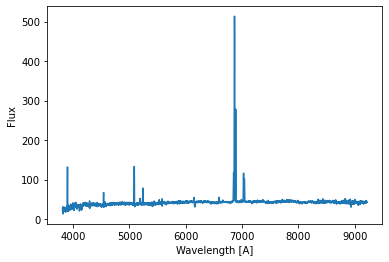

In [9]:
tbl = Table.read("../SDSS_spec_galaxy.csv")

wave = tbl["Wavelength"]
flux = tbl["Flux"]
plt.plot(wave, flux)
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux")


In [10]:
rest_wave = 6562.8

obs_wave = wave[flux==np.max(flux)]

z = (obs_wave - rest_wave) / rest_wave 

print("redshift is: ", z[0])

redshift is:  0.04594989943316869


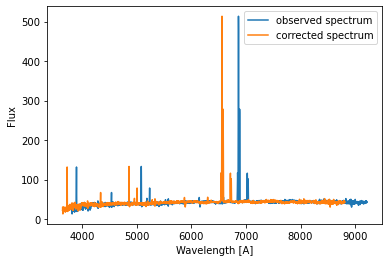

In [11]:
plt.plot(wave, flux, label="observed spectrum")
plt.plot(wave/(1+z[0]), flux, label="corrected spectrum")
plt.xlabel("Wavelength [A]")
plt.ylabel("Flux")
plt.legend()